# Ridge vs PCR vs PLS vs Baseline

Compares pooled and cross-sectional IC results using report CSV outputs.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

REPORT_DIR = Path('../data/processed/reports/signal_ic') if Path('../data/processed/reports/signal_ic').exists() else Path('data/processed/reports/signal_ic')
assert REPORT_DIR.exists(), f'Missing report dir: {REPORT_DIR}'
REPORT_DIR

PosixPath('../data/processed/reports/signal_ic')

In [2]:
ridge_pooled = pd.read_csv(REPORT_DIR / 'ridge_long_pooled_ic.csv')
pcr_pooled = pd.read_csv(REPORT_DIR / 'pcr_pooled_ic.csv')
pls_pooled = pd.read_csv(REPORT_DIR / 'pls_regression_pooled_ic.csv')
robust_pcr_pooled = pd.read_csv(REPORT_DIR / 'robust_pcr_pooled_ic.csv')

ridge_cs = pd.read_csv(REPORT_DIR / 'ridge_long_cross_sectional_ic.csv')
pcr_cs = pd.read_csv(REPORT_DIR / 'pcr_cross_sectional_ic.csv')
pls_cs = pd.read_csv(REPORT_DIR / 'pls_regression_cross_sectional_ic.csv')
robust_pcr_cs = pd.read_csv(REPORT_DIR / 'robust_pcr_cross_sectional_ic.csv')

In [3]:
pooled = ridge_pooled[['Entry Time', 'Baseline']].copy()
pooled = pooled.merge(ridge_pooled[['Entry Time', 'Ridge Long', 'Improvement']].rename(columns={'Improvement': 'Ridge Improvement'}), on='Entry Time')
pooled = pooled.merge(pcr_pooled[['Entry Time', 'PCR', 'Improvement']].rename(columns={'Improvement': 'PCR Improvement'}), on='Entry Time')
pooled = pooled.merge(pls_pooled[['Entry Time', 'PLS Regression', 'Improvement']].rename(columns={'Improvement': 'PLS Improvement'}), on='Entry Time')
pooled = pooled.merge(robust_pcr_pooled[['Entry Time', 'Robust PCR', 'Improvement']].rename(columns={'Improvement': 'Robust PCR Improvement'}), on='Entry Time')
pooled

,Entry Time,Baseline,Ridge Long,Ridge Improvement,PCR,PCR Improvement,PLS Regression,PLS Improvement
0,13:00,0.017062,0.019765,0.002704,0.040727,0.023665,0.025418,0.008356
1,13:30,0.017583,0.022677,0.005094,0.039824,0.022241,0.020942,0.003359
2,14:00,0.016365,0.033461,0.017097,0.041062,0.024697,0.028394,0.012029
3,14:30,0.013679,0.031821,0.018143,0.042344,0.028665,0.031021,0.017342
4,15:00,0.015135,0.035870,0.020734,0.042619,0.027484,0.030966,0.015830
5,15:30,0.010435,0.029909,0.019474,0.032321,0.021886,0.020881,0.010446


In [4]:
cs = ridge_cs[['Entry Time', 'Baseline IC']].copy()
cs = cs.merge(ridge_cs[['Entry Time', 'Ridge Long IC', 'Improvement']].rename(columns={'Improvement': 'Ridge Improvement'}), on='Entry Time')
cs = cs.merge(pcr_cs[['Entry Time', 'PCR IC', 'Improvement']].rename(columns={'Improvement': 'PCR Improvement'}), on='Entry Time')
cs = cs.merge(pls_cs[['Entry Time', 'PLS Regression IC', 'Improvement']].rename(columns={'Improvement': 'PLS Improvement'}), on='Entry Time')
cs = cs.merge(robust_pcr_cs[['Entry Time', 'Robust PCR IC', 'Improvement']].rename(columns={'Improvement': 'Robust PCR Improvement'}), on='Entry Time')
cs

,Entry Time,Baseline IC,Ridge Long IC,Ridge Improvement,PCR IC,PCR Improvement,PLS Regression IC,PLS Improvement
0,13:00,0.066947,0.015199,-0.051748,0.035792,-0.031155,0.016427,-0.050521
1,13:30,0.081488,0.025944,-0.055544,0.046457,-0.035030,0.029981,-0.051506
2,14:00,0.092423,0.049103,-0.043320,0.061814,-0.030609,0.045007,-0.047416
3,14:30,0.095329,0.051235,-0.044093,0.060181,-0.035147,0.048127,-0.047202
4,15:00,0.097664,0.054998,-0.042666,0.058494,-0.039169,0.043205,-0.054458
5,15:30,0.085238,0.047785,-0.037453,0.047386,-0.037852,0.033966,-0.051272


In [5]:
summary = pd.DataFrame({
    'Model': ['Ridge', 'PCR', 'PLS', 'Robust PCR'],
    'Mean Pooled Improvement': [
        ridge_pooled['Improvement'].mean(),
        pcr_pooled['Improvement'].mean(),
        pls_pooled['Improvement'].mean(),
        robust_pcr_pooled['Improvement'].mean(),
    ],
    'Mean Cross-Sectional Improvement': [
        ridge_cs['Improvement'].mean(),
        pcr_cs['Improvement'].mean(),
        pls_cs['Improvement'].mean(),
        robust_pcr_cs['Improvement'].mean(),
    ],
})
summary.sort_values('Mean Cross-Sectional Improvement', ascending=False)

,Model,Mean Pooled Improvement,Mean Cross-Sectional Improvement
1,PCR,0.024773,-0.034827
0,Ridge,0.013874,-0.045804
2,PLS,0.011227,-0.050396


In [6]:
ridge_ticker = pd.read_csv(REPORT_DIR / 'ridge_long_per_ticker_1430.csv', index_col=0)
pcr_ticker = pd.read_csv(REPORT_DIR / 'pcr_per_ticker_1430.csv', index_col=0)
pls_ticker = pd.read_csv(REPORT_DIR / 'pls_regression_per_ticker_1430.csv', index_col=0)
robust_pcr_ticker = pd.read_csv(REPORT_DIR / 'robust_pcr_per_ticker_1430.csv', index_col=0)

per_ticker = ridge_ticker[['Baseline IC', 'Ridge Long IC']].copy()
per_ticker = per_ticker.join(pcr_ticker[['PCR IC']], how='outer')
per_ticker = per_ticker.join(pls_ticker[['PLS Regression IC']], how='outer')
per_ticker = per_ticker.join(robust_pcr_ticker[['Robust PCR IC']], how='outer')
per_ticker['Ridge Improvement'] = per_ticker['Ridge Long IC'] - per_ticker['Baseline IC']
per_ticker['PCR Improvement'] = per_ticker['PCR IC'] - per_ticker['Baseline IC']
per_ticker['PLS Improvement'] = per_ticker['PLS Regression IC'] - per_ticker['Baseline IC']
per_ticker['Robust PCR Improvement'] = per_ticker['Robust PCR IC'] - per_ticker['Baseline IC']
per_ticker = per_ticker.sort_index()
per_ticker

,Baseline IC,Ridge Long IC,PCR IC,PLS Regression IC,Ridge Improvement,PCR Improvement,PLS Improvement
AEG,0.007300,0.104600,0.140531,0.164633,0.097300,0.133232,0.157333
ARGX,-0.016967,0.143480,0.038302,0.060282,0.160448,0.055269,0.077250
ASML,0.063904,0.202332,0.125824,0.110560,0.138428,0.061920,0.046656
AZN,0.103775,0.000824,0.006661,-0.019211,-0.102951,-0.097113,-0.122986
BBVA,0.160436,-0.003311,0.175625,0.218843,-0.163747,0.015189,0.058407
BCS,0.054276,0.281910,0.313146,0.312972,0.227635,0.258870,0.258696
BP,-0.121139,-0.058683,-0.149744,-0.109867,0.062456,-0.028605,0.011272
BTI,-0.205873,-0.326656,-0.255814,-0.282553,-0.120783,-0.049940,-0.076679
BUD,0.015639,0.016502,0.080530,0.017884,0.000863,0.064891,0.002246
DB,0.120034,0.027041,0.043068,0.013236,-0.092992,-0.076966,-0.106797


In [7]:
per_ticker_summary = pd.DataFrame({
    'Model': ['Ridge', 'PCR', 'PLS', 'Robust PCR'],
    'Mean Improvement': [
        per_ticker['Ridge Improvement'].mean(),
        per_ticker['PCR Improvement'].mean(),
        per_ticker['PLS Improvement'].mean(),
        per_ticker['Robust PCR Improvement'].mean(),
    ],
    'Tickers Improved (>0)': [
        (per_ticker['Ridge Improvement'] > 0).sum(),
        (per_ticker['PCR Improvement'] > 0).sum(),
        (per_ticker['PLS Improvement'] > 0).sum(),
        (per_ticker['Robust PCR Improvement'] > 0).sum(),
    ]
})

best_model_by_ticker = pd.DataFrame(index=per_ticker.index)
best_cols = ['Ridge Improvement', 'PCR Improvement', 'PLS Improvement', 'Robust PCR Improvement']
best_model_by_ticker['Best Model'] = per_ticker[best_cols].idxmax(axis=1).str.replace(' Improvement', '', regex=False)
best_model_by_ticker['Best Improvement'] = per_ticker[best_cols].max(axis=1)

display(per_ticker_summary.sort_values('Mean Improvement', ascending=False))
display(best_model_by_ticker.sort_values('Best Improvement', ascending=False))

,Model,Mean Improvement,Tickers Improved (>0)
1,PCR,0.038616,29
2,PLS,0.031796,26
0,Ridge,0.013093,24


,Best Model,Best Improvement
BCS,PCR,0.258870
E,Ridge,0.230588
TS,Ridge,0.180644
PSO,Ridge,0.165155
ARGX,Ridge,0.160448
AEG,PLS,0.157333
NGG,PCR,0.156265
RELX,PCR,0.154288
NVO,PLS,0.146051
ASML,Ridge,0.138428


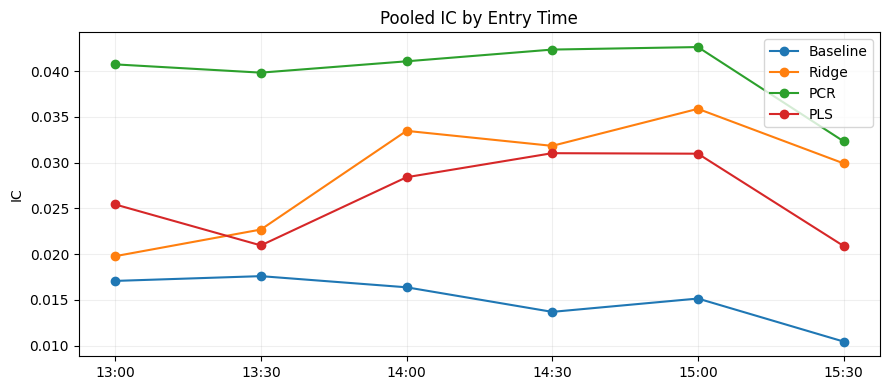

In [8]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(pooled['Entry Time'], pooled['Baseline'], marker='o', label='Baseline')
ax.plot(pooled['Entry Time'], pooled['Ridge Long'], marker='o', label='Ridge')
ax.plot(pooled['Entry Time'], pooled['PCR'], marker='o', label='PCR')
ax.plot(pooled['Entry Time'], pooled['PLS Regression'], marker='o', label='PLS')
ax.plot(pooled['Entry Time'], pooled['Robust PCR'], marker='o', label='Robust PCR')
ax.set_title('Pooled IC by Entry Time')
ax.set_ylabel('IC')
ax.legend()
ax.grid(alpha=0.2)
plt.tight_layout()

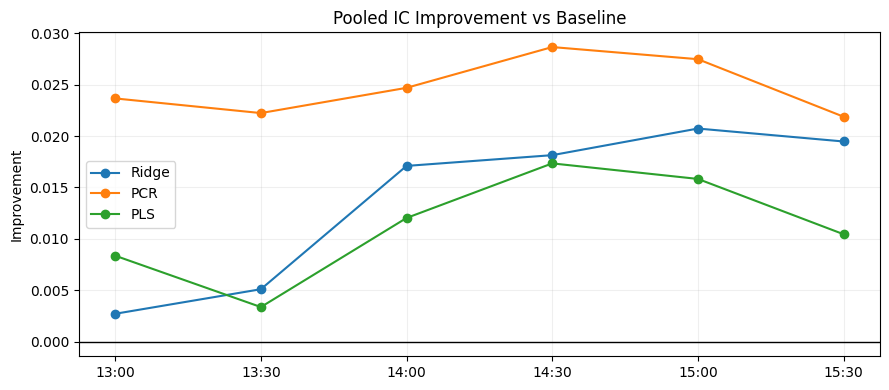

In [9]:
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(pooled['Entry Time'], pooled['Ridge Improvement'], marker='o', label='Ridge')
ax.plot(pooled['Entry Time'], pooled['PCR Improvement'], marker='o', label='PCR')
ax.plot(pooled['Entry Time'], pooled['PLS Improvement'], marker='o', label='PLS')
ax.plot(pooled['Entry Time'], pooled['Robust PCR Improvement'], marker='o', label='Robust PCR')
ax.axhline(0.0, color='black', linewidth=1)
ax.set_title('Pooled IC Improvement vs Baseline')
ax.set_ylabel('Improvement')
ax.legend()
ax.grid(alpha=0.2)
plt.tight_layout()